## Skittles Datascience

In [47]:
#Imports
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)

In [48]:
#matplotlib and sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
# import sklearn.datasets - may not need this as we have a dataset to work with

The original csv included columns that counted out perfect Skittles and defective Skittles which were then added up in the CSV.
These columns were removed because they weren't necessary and we could just do a df.sum() later.

In [3]:
# Reading as a dataframe
df = pd.read_csv('skittles_fixed.csv')
df.head(10)

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange
0,1,3,25,6,14,6,0,0,2,1,1
1,2,12,11,10,14,9,0,1,2,1,4
2,3,8,13,6,17,10,0,5,0,1,1
3,4,13,9,12,9,10,1,0,2,1,1
4,5,13,7,8,13,11,0,0,1,1,3
5,6,17,7,10,14,8,0,0,3,0,1
6,7,5,7,21,8,14,2,1,2,0,2
7,8,14,7,13,11,11,2,0,1,1,1
8,9,13,10,8,16,6,0,2,2,1,2
9,10,11,14,6,10,12,0,4,0,1,1


We then tried to create an array of arrays out of the Skittles, but ran into an issue with having a proper X and y axis.

In [4]:
skittles_data = pd.read_csv('skittles_fixed.csv')
X = skittles_data.iloc[0:100].values
X

array([[  1,   3,  25, ...,   2,   1,   1],
       [  2,  12,  11, ...,   2,   1,   4],
       [  3,   8,  13, ...,   0,   1,   1],
       ...,
       [ 98,   5,  12, ...,   3,   3,   0],
       [ 99,   9,  13, ...,   0,   1,   2],
       [100,  10,  10, ...,   3,   0,   4]], dtype=int64)

In [5]:
#looking at the df again...
df.head()

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange
0,1,3,25,6,14,6,0,0,2,1,1
1,2,12,11,10,14,9,0,1,2,1,4
2,3,8,13,6,17,10,0,5,0,1,1
3,4,13,9,12,9,10,1,0,2,1,1
4,5,13,7,8,13,11,0,0,1,1,3


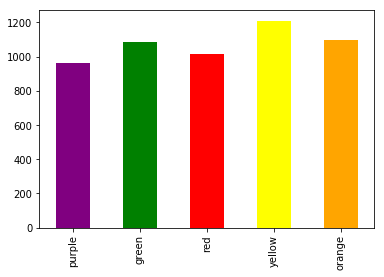

In [6]:
#Creating visualization from a SUM across the Skittles totals (sorted by colors)
df.sum()[['purple', 'green', 'red', 'yellow', 'orange']].plot(kind='bar', color=['purple', 'green', 'red', 'yellow', 'orange'])

In [7]:
# Getting numerical sums for our set of 100 bags
df.sum()

bag_number    5052
purple         964
green         1087
red           1014
yellow        1211
orange        1095
d_purple       107
d_green        215
d_red          172
d_yellow        67
d_orange       214
dtype: int64

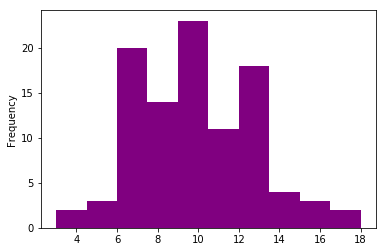

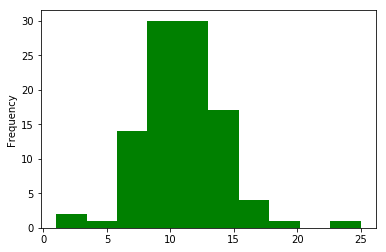

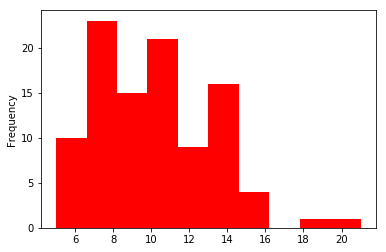

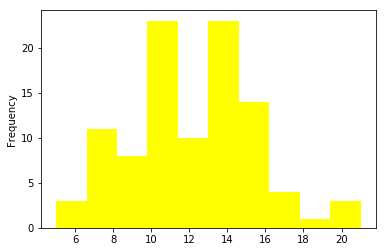

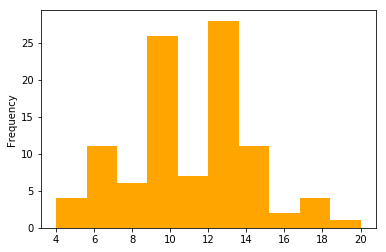

In [8]:
#Histogram visualizations by color
for color in ['purple', 'green', 'red', 'yellow', 'orange']:
    df[color].plot(kind='hist', color=color)
    plt.show()

We were hoping that the Histograms would reveal some consistency with how the Skittles were disbursed in terms of machine predictability.
The most consistent thing about the bags was how inconsistently they were packed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000111916B9390>,
      dtype=object)

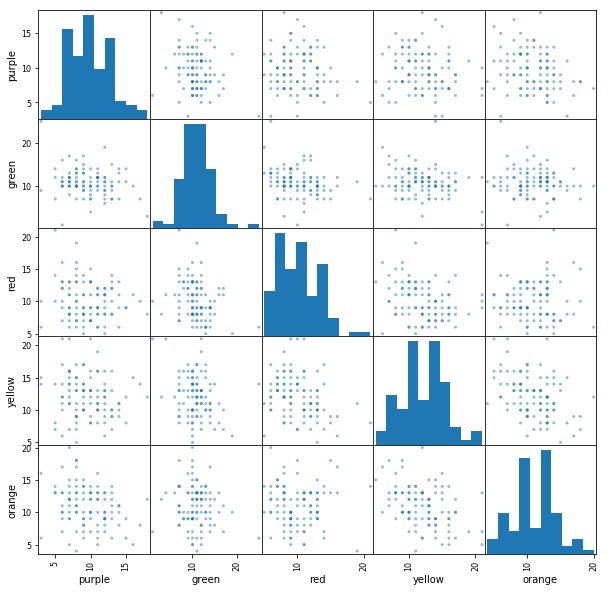

In [188]:
#Scatter Matrix
pd.plotting.scatter_matrix(df[['purple', 'green', 'red', 'yellow', 'orange']], figsize=(10,10))


The results of our Scatterplot did not reveal the "magic formula" we could use to predict the contents of a bag without a vague generalization.  So, we changed our methods to see if there was any further information that could be revealed to us.
(THANKS NATE!)

In [10]:
x_color = 'yellow'
y = df[[color for color in ['purple', 'green', 'red', 'yellow', 'orange'] if color != x_color]]
X = df[x_color]

X.head()
y.head()

,purple,green,red,orange
0,3,25,6,6
1,12,11,10,9
2,8,13,6,10
3,13,9,12,10
4,13,7,8,11


Our approach shifted to see if we could accurately predict the counts of four (4) color groups of Skittles by comparing it to the color and count of ONE group.  Pull one color out for the X value and see if we can predict the remaining colors as our y values.  "If we have X amount of reds, then we have y amount of Green, Orange, Purple, and Yellow."

This is what's called a Mulitvariate Problem (when we're trying to determine an outcome based on multiple y values).

### TEST 1: X = Orange, y = purple, green, red, and yellow.

In [11]:
y = df[['purple', 'green', 'red', 'yellow',]]
X = df[ 'orange'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.06645858383398072

Good News - Nate has never seen a score this bad, so... there's that.
#### Bad News - NATE HAS NEVER SEEN A SCORE THIS BAD.
We actually got a NEGATIVE R Squared Score on our first pass.

In [12]:
#Need to round and try to determine
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['purple', 'green', 'red', 'yellow',])

,purple,green,red,yellow
0,9.620531,10.847999,10.25237,12.059056


### TEST 2: X = Yellow, y = Purple, Green, Red, and Orange.

In [13]:
y = df[['purple','green','red','orange']]
X = df['yellow'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.027214765557958515

In [14]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['purple', 'green', 'red','orange'])

,purple,green,red,orange
0,9.728007,11.415465,10.834278,11.819734


### TEST 3: X = Purple, y = Green, Red, Orange, and Yellow.

In [15]:
y = df[['green','red','orange','yellow']]
X = df['purple'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.05681204355090093

In [16]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['green', 'red','orange','yellow'])

,green,red,orange,yellow
0,10.168674,10.011866,10.633396,12.122687


### TEST 4: X = Green, y = Orange, Purple, Red, and Yellow.

In [17]:
y = df[['orange','purple','red','yellow']]
X = df['green'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.007142678655936656

In [18]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['orange','purple','red','yellow'])

,orange,purple,red,yellow
0,10.53522,9.679762,8.246611,10.344114


### TEST 5: X = Red, y = Orange, Purple, Yellow, and Green.

In [19]:
y = df[['orange','purple','yellow','green']]
X = df['red'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.05900625504653933

In [20]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['orange','purple','yellow','green'])

,orange,purple,yellow,green
0,11.361234,9.229761,10.818512,9.990041


### EXTRA TEST - Does adding the defective Skittles change our scores?

In [21]:
y = df[['orange','purple','yellow','green','d_orange','d_purple','d_yellow','d_green']]
X = df['red'] 

#R Squared Scoring Code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.07540221298660402

In [22]:
pd.DataFrame(model.predict(X_test[0].reshape(-1,1)), columns=['orange','purple','yellow','green','d_orange','d_purple','d_yellow','d_green'])

,orange,purple,yellow,green,d_orange,d_purple,d_yellow,d_green
0,10.746231,10.895336,13.424179,11.510858,2.512313,1.331493,0.69041,2.634888


### What did we learn?

It doesn't appear that adding the defective Skittles changes our scoring model.  Rather than being predictive based on machine learning, it appears that the data lends itself to a Burnoulli Model - meaning that the estimation of the bag contents relies more on averages to guess.

### Will adding an additional 468 packs change the results?
Let's find out!

In [23]:
#Using the power of the Internet...
df_468 = pd.read_csv('skittles_468.csv')
df_468.head()

,purple,green,red,yellow,orange,uncounted
0,18,7,10,11,15,0
1,10,15,5,17,12,0
2,9,11,16,15,11,0
3,7,16,15,13,8,0
4,7,8,11,20,14,1


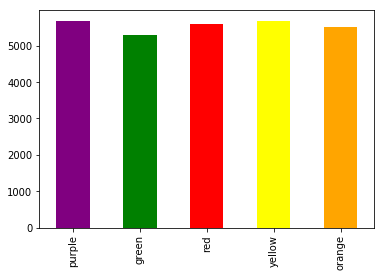

In [24]:
#Creating visualization with additional Skittles
df_468.sum()[['purple', 'green', 'red', 'yellow', 'orange']].plot(kind='bar', color=['purple', 'green', 'red', 'yellow', 'orange'])

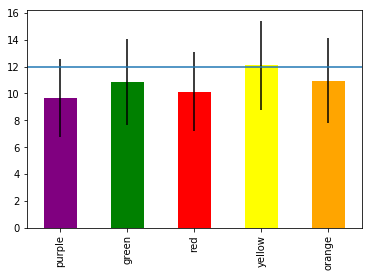

In [189]:
# 100 Original bags with standard deviation added (as our defective Skittles).
#  This means our average count of perfect and defective Skittles is about 12 of each color per bag.  Avg. 60 Skittles per bag.
plt.axhline(12)
(df.mean()[['purple', 'green', 'red', 'yellow', 'orange']]
    .plot(kind='bar', color=['purple', 'green', 'red', 'yellow', 'orange'], yerr=df.std()[['purple', 'green', 'red', 'yellow', 'orange']]))


In [50]:
#Creating 1 dataset out of 2 datasets
mod_df_468 = df_468.copy().drop('uncounted', axis=1)
mod_df_468['d_purple'] = np.zeros(468)
mod_df_468['d_green'] = np.zeros(468)
mod_df_468['d_red'] = np.zeros(468)
mod_df_468['d_yellow'] = np.zeros(468)
mod_df_468['d_orange'] = np.zeros(468)
mod_df_468['bag_number'] = np.arange(101, 569)
mod_df_468.head()
df_568 = pd.concat([df_100, mod_df_468[df_100.columns]])
df_568.head()
df_568.shape

(568, 11)

In [30]:
df_568.head()

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange
0,1,3,25,6,14,6,0.0,0.0,2.0,1.0,1.0
1,2,12,11,10,14,9,0.0,1.0,2.0,1.0,4.0
2,3,8,13,6,17,10,0.0,5.0,0.0,1.0,1.0
3,4,13,9,12,9,10,1.0,0.0,2.0,1.0,1.0
4,5,13,7,8,13,11,0.0,0.0,1.0,1.0,3.0


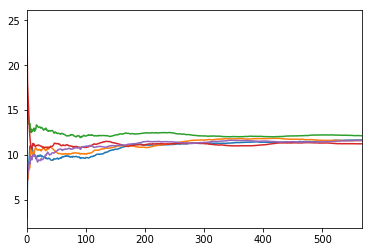

In [31]:
# Cumulative Sum - 
(df_568.cumsum()['purple']  / df_568.bag_number).reset_index(drop=True).plot()
(df_568.cumsum()['red']  / df_568.bag_number).reset_index(drop=True).plot()
(df_568.cumsum()['yellow']  / df_568.bag_number).reset_index(drop=True).plot()
(df_568.cumsum()['green']  / df_568.bag_number).reset_index(drop=True).plot()
(df_568.cumsum()['orange']  / df_568.bag_number).reset_index(drop=True).plot()

Over the long run, our averages of colors should even out even though color counts vary between bags - 
even with the extra set of data available.

(<matplotlib.axes._subplots.AxesSubplot at 0x111940f1470>,
 (-0.5, 99.5, 0.0, 61.95))

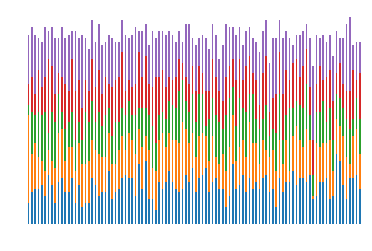

In [192]:
df[['orange', 'green', 'purple', 'red', 'yellow']].plot.bar(stacked=True, legend=False),plt.axis('off')

### What other interesting things could the Skittles tell us?
How many duplicate bags could we find?  How many "perfect bags could we find in both the original 100 and additional 468 bags?

In [193]:
#Breaking our Skittles down into value counts to find "perfect" bags
(df_568.orange * 100 
+df_568.yellow * 10000
+df_568.red * 1000000
+df_568.green * 100000000
+df_568.purple * 10000000000).value_counts().sort_values(ascending=False).head()


111311121100    2
71006122000     1
102216050700    1
120918071300    1
61212121100     1
dtype: int64

In [75]:
df_468.iloc[333]

purple       11
green        13
red          11
yellow       12
orange       11
uncounted     0
Name: 333, dtype: int64

In [74]:
df_468.iloc[463]

purple       11
green        13
red          11
yellow       12
orange       11
uncounted     0
Name: 463, dtype: int64

This told us that out of 100 bags, there were only 2 bags that had 0 defective Skittles

In [194]:
df.loc[((df.d_purple ==  0) 
  & (df.d_green ==  0)
  & (df.d_red ==  0)
  & (df.d_yellow ==  0)
  & (df.d_orange ==  0))]

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange,box_number
55,56,11,13,11,10,12,0,0,0,0,0,2.0
61,62,8,14,8,9,17,0,0,0,0,0,2.0


Does this mean that the additional 468 bags had 412 bags with no defects? Unlikely the counting method for the additional
458 bags was not consistent with how we counted 100 bags.  The 'Uncounted" column in the dataset wasn't defined like our "defective" Skittles - so this isn't accurate.

In [195]:
df_468.head().loc[(df_468.uncounted ==  0) ]

,purple,green,red,yellow,orange,uncounted
0,18,7,10,11,15,0
1,10,15,5,17,12,0
2,9,11,16,15,11,0
3,7,16,15,13,8,0


In [196]:
df_468.tail().loc[(df_468.uncounted ==  0) ]

,purple,green,red,yellow,orange,uncounted
463,11,13,11,12,11,0
464,12,11,17,8,10,0
465,15,10,9,12,14,0
466,10,10,12,11,14,0
467,15,13,11,12,8,0


### Can we prove the NULL HYPOTHESIS?

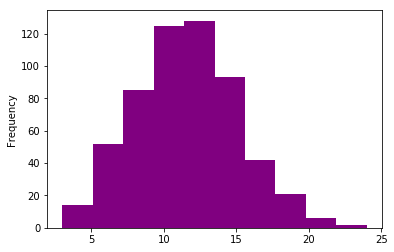

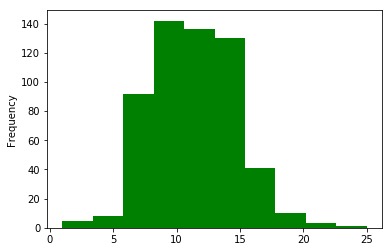

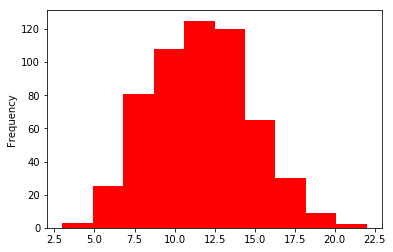

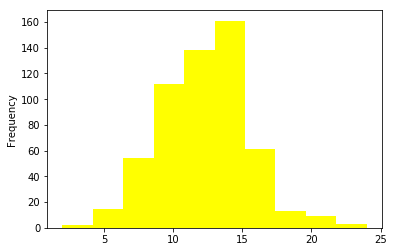

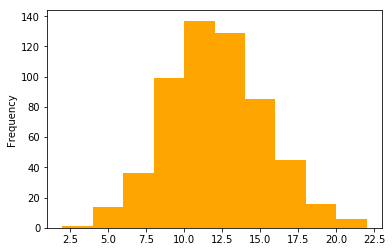

In [197]:
#df_568.orange.hist()
for color in ['purple', 'green', 'red', 'yellow', 'orange']:
    df_568[color].plot(kind='hist', color=color)
    plt.show()

Value Counts per color - read from right to left (69 bags with 11 orange Skittles)

In [92]:
df_568.orange.value_counts()

11    69
13    68
10    68
12    61
9     60
14    49
8     39
15    36
16    23
17    22
7     21
6     15
18    12
5     10
20     5
4      4
19     4
22     1
2      1
Name: orange, dtype: int64

In [198]:
df_568.purple.value_counts()

12    70
11    66
10    59
13    58
14    51
9     45
15    42
8     40
7     33
16    23
17    19
6     19
18    14
5     10
19     7
21     4
3      3
20     2
22     1
4      1
24     1
Name: purple, dtype: int64

In [199]:
df_568.red.value_counts()

12    71
13    71
10    56
8     54
11    54
9     52
14    49
15    41
7     27
16    24
6     18
17    16
18    14
5      7
19     7
4      2
20     2
22     1
21     1
3      1
Name: red, dtype: int64

In [200]:
df_568.green.value_counts()

10    80
11    76
9     62
12    60
13    55
8     44
14    42
7     34
15    33
16    24
17    17
6     14
5      5
18     4
22     3
19     3
20     3
4      3
3      3
2      1
25     1
1      1
Name: green, dtype: int64

In [201]:
df_568.yellow.value_counts()

12    70
10    69
11    68
13    65
14    50
15    46
9     43
8     34
16    32
17    29
7     20
6      8
19     7
5      7
18     6
20     5
21     4
22     2
4      1
24     1
2      1
Name: yellow, dtype: int64

### Returning to the original 100 bags and compartmentalizing per box of 36

In [117]:
df['box_number']= (np.floor(df.bag_number/36)+1)
df.head()

,bag_number,purple,green,red,yellow,orange,d_purple,d_green,d_red,d_yellow,d_orange,box_number
0,1,3,25,6,14,6,0,0,2,1,1,1.0
1,2,12,11,10,14,9,0,1,2,1,4,1.0
2,3,8,13,6,17,10,0,5,0,1,1,1.0
3,4,13,9,12,9,10,1,0,2,1,1,1.0
4,5,13,7,8,13,11,0,0,1,1,3,1.0


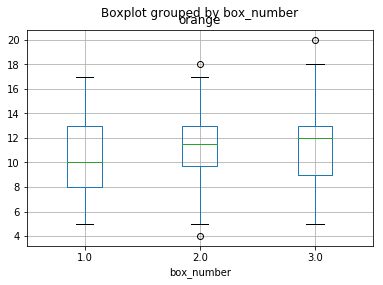

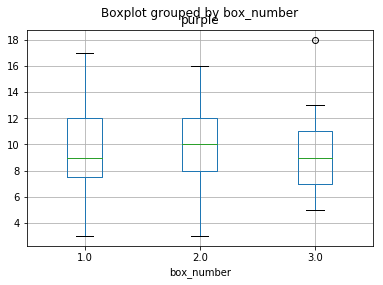

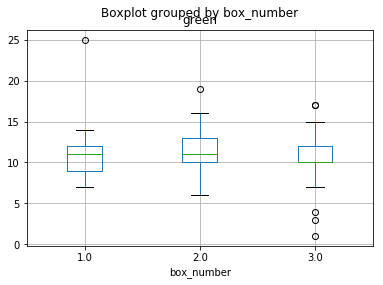

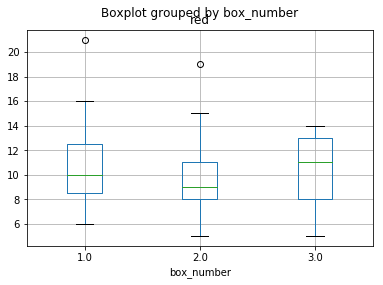

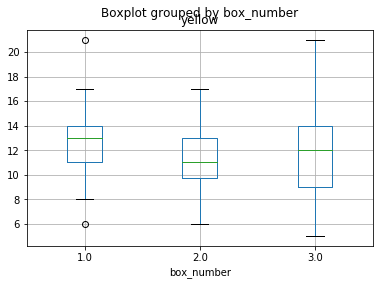

In [203]:
### Displaying box plots to see if there's symmetry in the data by box, by color ###
# df[df.box_number==1].orange.hist()
# plt.show()
# df[df.box_number==2].orange.hist()
# plt.show()
# df[df.box_number==3].orange.hist()
# plt.show()
df.boxplot(by='box_number', column='orange')
df.boxplot(by='box_number', column='purple')
df.boxplot(by='box_number', column='green')
df.boxplot(by='box_number', column='red')
df.boxplot(by='box_number', column='yellow')

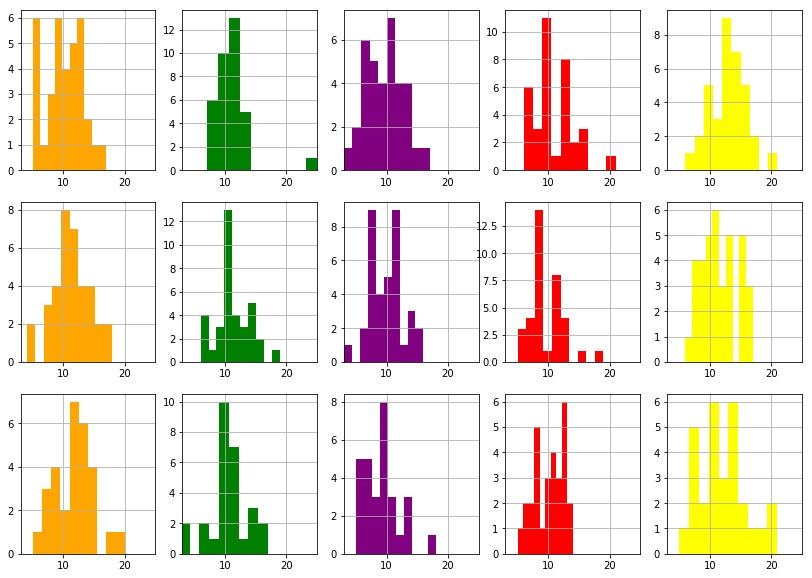

In [156]:
plt.figure(figsize=(14, 10))

for box_number in [1,2,3]:
    for color_index, color in enumerate(['orange', 'green', 'purple', 'red', 'yellow']):
        
        plt_index = (color_index+1) + (box_number-1)*5
#         print(dict(nrows=3, ncols=5, index=plt_index))
        ax = plt.subplot(3, 5, plt_index)
        ax.set_xlim([3, 25])
        df[df.box_number==box_number][color].hist(color=color)#, xlim=(5,25))#xmin=5, xmax=25)

### ANOVA Statistical Check

In [204]:
list(enumerate(['red', 'green','yellow','orange','purple']))

[(0, 'red'), (1, 'green'), (2, 'yellow'), (3, 'orange'), (4, 'purple')]

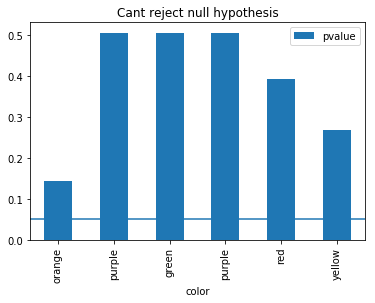

In [135]:
#P Value
p_values = []
#Calculate the ANOVA:
#1) For each color....
#2) ANOVA is calculated across the different boxes; 
#NULL HYPOTHESIS: Doesnt matter which box you came from; I expect a similar distribution of the counts of ____color____
# NON-NULL : Box affects your count of color
for color in ['orange', 'purple', 'green', 'purple', 'red', 'yellow']:
    p_values.append({'color': color, 'pvalue': scipy.stats.f_oneway(*df.groupby('box_number')[color].apply(list)).pvalue })

pd.DataFrame(p_values).plot(kind='bar', x='color', y='pvalue', title='Cant reject null hypothesis')
plt.axhline(0.05)

In [ ]:
# Export.
df_100.to_csv(r'C:\Users\RobbenWeems\Documents\DA Bootcamp\FINAL PROJECT\skittles_export.csv')

In [ ]:
# Export.
df_468.to_csv(r'C:\Users\RobbenWeems\Documents\DA Bootcamp\FINAL PROJECT\skittles_export.csv')

In [ ]:
# Export of 100 and 468 JOINED together.
df.to_csv(r'C:\Users\RobbenWeems\Documents\DA Bootcamp\FINAL PROJECT\skittles_exportALL.csv')

### So what does this all mean?

Machine Learning needs a solid X and Y for proper regression and prediction.  Our question was "could we use machine learning to predict the contents of a bag of Skittles?"  Since the data in both sets (df_100 and df_468) showed us that the results would rely more on averages than on prediction, proper machine learning couldn't truly be appied to this problem.  We even tried using aspecfic color of Skittle (X) to determine the color and quantity of our remaining Skittles (y), and our R Squred Score was quite low.  DRAT!

A prediction can be made by the machine, but it's just going to divide the total sum of all the Skittles and divide it by to number of colors (5).  If the data shows us that there is an average of 60 Skittles per bag, and that breaks down to 5 colors, that means there's an average of 12 Skittles per color (60/5 = 12), regardless of defects, or of a larger data set.

The data analysis did support the NULL HYPOTHESIS.  The null hypothesis attempts to show that no variation exists between variables or that a single variable is no different than its mean. It is presumed to be true until statistical evidence nullifies it for an alternative hypothesis.  Simply put - with the data we have, there's no corellation between our variables.  A specific bag of Skittles from a specific box and it's specific contents (called bag 21) has no correlation with bag 54 or bag 999...other than Skittles are delicious.

Out of 100 bags of Skittles in df_100, we saw two bags with no defects.  Out of 468 bags in df_468, two had an identical colors and counts.  Coincidence?  No.  Just the law of averages in a Bernoulli Trail.

Before we leave, here are some fast facts about what we encountered.

- 1 bag of Skittles contains 45 grams of sugar - that's 90% of the recommended daily amount.
- 100 bags of Skittles is 4,500 grams of sugar (or 4,500 sugar packets).
- From the 100 bags:
- Purple: 964
- Purple Defects: 107
- Green: 964
- Green Defects: 215
- Red: 1,014
- Red Defects: 172
- Yellow: 1,211
- Yellow Defects: 67
- Orange: 1,095
- Orange Defects: 214
- Average time to unwrap, sort, count, and photograph Skittles: 1 min 50 seconds.

# TASTE THE RAINBOW!